<a href="https://colab.research.google.com/github/Hendrix8/Pattern_Recognition/blob/main/Assignment_2/A2_tem2405.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Importing libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.special as sp
from matplotlib import rc

rc('animation', html='jshtml')

from mpl_toolkits import mplot3d
import matplotlib.animation as animation

In [18]:
# Accessing the csv files
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exercise 1 : Medical Test Paradox




**Question 1** : 
Write a function in python that given the accuracy of a test and the prior
probability of having a disease it returns the posterior probability of having that
disease given that you tested positive.

**Approach** :

Knowing sensitivity of the test, $P(+ | D)$ ,

the specificity of the test, $P(-|D^\complement)$

and the prior probability of having the disease, $P(D)$

We have the following: 


$ P(D|+) =  \large \frac {P(+|D)\ \cdot \ P(D)} {P(+|D) \ \cdot \ P(D) \ + \ P(+|D^\complement) \ \cdot \ P(D^\complement)} \ \ \ \ (*)$ 

Where 

$i) \ P(D^\complement) = 1 - P(D) $

$ii) \ P(+|D^\complement) = 1 - P(-|D^\complement)$

In [19]:
def probCalc(P_pos_D,P_neg_notD, P_D):

  # finding P(!D)
  P_notD = 1 - P_D 
  
  # finding P(+|!D)
  P_pos_notD = 1 - P_neg_notD

  # calculate P(D|+) using the formula (*)
  P_D_pos_value = (P_pos_D * P_D) /( (P_pos_D * P_D) + (P_pos_notD * P_notD) )

  return P_D_pos_value


**Question 2** : Use the function you implemented to calculate that given the statistics above,
what is the probability of that person having the disease? Print the result as a
percentage.

First we calculate the prior $P(D)$ given the statistics

$ P(D) \approx \large \frac{Total \ Cases}{Population} $ 

Then we calculate $ P(D|+)$ using the function we created in Question 1.

In [20]:
P_D = 350000 / (7.9 * 10**(9))
P_pos_D = 0.98
P_neg_notD = 0.95

P_D_pos = probCalc(P_pos_D, P_neg_notD, P_D)

print("The probability of a person having the disease given that the" + 
" test was positive is ", round(P_D_pos * 100, 3), "%")

The probability of a person having the disease given that the test was positive is  0.087 %


**Question 3** : Having calculated the probability of that person having the rare disease you
decided to tell the doctor that another test should be carried out since there is not enough evidence to come to a conclusion. Another test is being done to that person and again it comes out positive. After another positive test calculate and print (as a percentage) the posterior probability of that person having the disease.

Let $ +\cap + = the \ event \ that \ the \ first \\ \ and \ the \ second \ test \ have \ positive \ outcome $

then we can assume that the outcome of one test is independent of the outcome of another test ( i.e. the event that the second test has positive outcome has the same probability with the event that the first test has positive outcome ) 

Therefore we have that $\ P(+\cap+) = P(+) \cdot P(+)$ 

Using the formula $ \ \ (*) \ \$  we get 

$P(D \ |+\cap \ +)  \large = \frac {P(+\ \cap \ +| D) \ \cdot \ P(D)}{P(+\ \cap \ +| D) \ \cdot \ P(D) \ + \ P(+\ \cap \ +| D^\complement) \ \cdot \ P(D^\complement)} = \frac {P(+ | D)^2 \ \cdot \ P(D)}{P(+| D)^2 \ \cdot \ P(D) \ + \ P(+| D^\complement)^2 \ \cdot \ P(D^\complement)} $ 


and

$P(+|D^\complement)^2 = (1-P(-|D^\complement))^2  \ \ \ \large (* \ *) $




In [21]:
P_pp_D = P_pos_D**2

# calculating P(- and -|!D) using the formula (* *)
P_pp_notD = (1 - P_neg_notD)**2

P_D_pp = probCalc(P_pp_D, 1 - P_pp_notD, P_D)

print("The probability of a person having the disease given that "+
      "two consecutive tests had positive outcome "+
      "is ", round(P_D_pp * 100, 3), "%")

The probability of a person having the disease given that two consecutive tests had positive outcome is  1.674 %


**Question 4** :  Calculate step 2 again given that the total cases in 2021 were approximately:

a. 1 million people

b. 10 million people

c. 1 billion people

In [22]:
# a) 
P_D = 1000000 / (7.9 * 10**(9))

P_D_posA = probCalc(P_pos_D, P_neg_notD, P_D)

print("The probability of a person having the disease, given that the" + 
" test was positive and the total cases in 2021 are 1,000,000, is ", round(P_D_posA * 100, 3), "%")

# b)
P_D = 10000000 / (7.9 * 10**(9))

P_D_posB = probCalc(P_pos_D, P_neg_notD, P_D)

print("The probability of a person having the disease, given that the" + 
" test was positive and the total cases in 2021 are 10,000,000, is ", round(P_D_posB * 100, 3), "%")

# c) 
P_D = 1000000000/ (7.9 * 10**(9))

P_D_posC = probCalc(P_pos_D, P_neg_notD, P_D)

print("The probability of a person having the disease, given that the" + 
" test was positive and the total cases in 2021 are 1,000,000,000, is ", round(P_D_posC * 100, 3), "%")


The probability of a person having the disease, given that the test was positive and the total cases in 2021 are 1,000,000, is  0.248 %
The probability of a person having the disease, given that the test was positive and the total cases in 2021 are 10,000,000, is  2.424 %
The probability of a person having the disease, given that the test was positive and the total cases in 2021 are 1,000,000,000, is  73.962 %


**Question 5** : In 1-2 sentences write your thoughts on how and why the prior affects the
posterior probability of actually having the disease given that you tested positive.



From the answer in Question 4 we conclude that by increasing the prior, the posterior probability of having the disease also increases.

This result is expected since increase in prior means more people have the disease, which implies that the chances of a single person  having the disease, given that the test was positive, increase

We can also see this positive correlation in the formula below

$ P(D|+) = \large { \frac {P(+|D) \ \cdot \ P(D)}{P(+)} }$

---

# Exercise 2 : “In the footsteps of Bayes” (Visualizing Bayesian updating)


**Question 1** : 

Write a python function to calculate the posterior probability of the coin being
located at $ \ (x, y) \ $ given the observation $ \{L, F, N \} $.


$𝑃(𝑥,𝑦 \ | \ 𝐿,𝐹,𝑁) = 𝑃(𝑥 \ | \ 𝐿,𝐹,𝑁) \cdot 𝑃(𝑦 \ | \ 𝐿,𝐹,𝑁) = 𝑃(𝑥 \ | \ 𝐿,𝑁) \cdot 𝑃(𝑦 \ | \ 𝐹,𝑁) = \ ? $


(Hint: The last equality comes from the fact that the coin’s x-coordinate is independent of F and vice versa.)


$a)$ Given a single random toss, what is the probability of the ball landing left of/ right of/ in front of/ behind the coin?
 
 ( $0 \leq 𝑥 \leq 1 $,  Hint: The greater the coin’s x-coordinate, the greater the probability of the ball landing left of the coin - Try it yourself but highlight to reveal the first solution if you need to $)$.

$ i) \ 𝑃( \ 𝑙𝑒𝑓𝑡 \ | \ 𝑥,𝑦) = 𝑃( \ 𝑙𝑒𝑓𝑡 \ | \ 𝑥) =𝑥 \\
ii) \ 𝑃( \ 𝑟𝑖𝑔h𝑡 \ | \ 𝑥,𝑦) = 𝑃( \ 𝑟𝑖𝑔h𝑡 \ | \ 𝑥) = \ ? \\
iii) \ 𝑃( \ 𝑓𝑟𝑜𝑛𝑡 \ | \ 𝑥,𝑦) = 𝑃( \ 𝑓𝑟𝑜𝑛𝑡 \ | \ 𝑦) = \ ? \\
iv)  \ 𝑃( \ 𝑏𝑒h𝑖𝑛𝑑 \ | \ 𝑥,𝑦) = 𝑃( \ 𝑏𝑒h𝑖𝑛𝑑 \ | \ 𝑦 ) = \ ? \\ $

**Answer** :

 We have
 
  $i \, ) \ P( \ left| \ x) = \large \frac {Area \, ( \ [ \,0,x \,] \ \times \ [ \,0,1]\, \, )}{Area \, ( \ [ \,0,1 \,] \ \times \ [ \,0,1]\, \, )} \normalsize = \frac {x \cdot 1}{1 \cdot 1} = x$

 $ii \, ) \ P( \ right| \ x) = \large \frac {Area \, ( \ [ \,x,1 \,] \ \times \ [ \,0,1]\, \, )}{Area \, ( \ [ \,0,1 \,] \ \times \ [ \,0,1]\, \, )} \normalsize = \frac { \, (1 - x \, ) \cdot 1}{1 \cdot 1} = 1 - x$

$  iii \, ) \ P( \ front| \ y) = \large \frac {Area \, ( \ [ \,0,1 \,] \ \times \ [ \,0,y]\, \, )}{Area \, ( \ [ \,0,1 \,] \ \times \ [ \,0,1]\, \, )} \normalsize = \frac {  1 \cdot y}{1 \cdot 1} = y$

$  iv \, ) \ P( \ behind| \ y) =  1 - P( \ front| \ y) =1- y$


$b)$ What is the probability of the ball landing left of the coin 5 times in a row?

(Hint: individual ball tosses are completely independent events)

$i) \  𝑃( \ 𝐿=5,𝑁=5 \ | \ 𝑥,𝑦)= 𝑃( \ 𝐿=5,𝑁=5 \ | \ 𝑥) = \ ? $





**Answer** : 

$  𝑃( \ 𝐿=5,𝑁=5 \ | \ 𝑥) = \  P( \ left | \ x)^5 = x^5 $

$c)$ What is the probability that 3 out of 10 balls land left of the coin? 

(Hint:
It is the probability of the ball landing left 3 times multiplied by the probability landing right 7 times multiplied by the total number of possible orders in which 3 ‘lefts’ and 7 ‘rights’ can occur - for the last term use the binomial coefficient).


$ i) \ 𝑃( \ 𝐿=3,𝑁=10 \ | \ 𝑥,𝑦)=𝑃( \ 𝐿=3,𝑁=10 \ | \ 𝑥)= \ ?$

**Answer** : 

$ 𝑃( \ 𝐿=3,𝑁=10 \ | \ 𝑥)= \binom {10}{3} \cdot P \, ( \ left| \ x \, )^3 \cdot P \, ( \ right| \ x \, )^7 = 120 \cdot x^3 \cdot \, (1-x \, )^7  $

$d)$ If you have completed all the previous small steps, you should be
equipped with all the knowledge required to calculate $ 𝑃( \ 𝑥, 𝑦 \ |  \ 𝐿, 𝐹, 𝑁) $ using Bayes Theorem. 

(Hint: The terms $𝑃(𝑥)$ 𝑎𝑛𝑑 $𝑃(𝑦)$, that is the prior probabilities of the points of the table are the same among the points and can thus be ignored, since they would only scale the overall distribution. 

Additionally, $𝑃(𝐿, 𝑁)$ 𝑎𝑛𝑑 $𝑃(𝐹, 𝑁)$, namely the evidence, are constants and can thus be ignored).

**Answer** : 

Using the hints given we calculate 

$ P \, ( \ x | L = 18, N = 30 \, ) \large  = \frac { P \, ( \ L = 18, N = 30 |x  \, ) \cdot P \, (x \, )}{P \, ( L = 18, N = 30\,) }$

ignoring $P \,( x \, )$ and $ P \, ( L = 18, N = 30 \, ) $

We get 


$  P \, (\ L = 18, N = 30 | x \, ) = \binom {30}{18} \cdot x^{18} \cdot \, ( 1-x\, ) ^ {12}$

Similarly 

$  P \, (\ F = 8, N = 30 | y \, ) = \binom {30}{8} \cdot y^{8} \cdot \, ( 1-y\, ) ^ {22}$

Finally 

$  P \, ( \ x,y | \ L,F,N\,) = \binom {30}{18} \cdot \binom {30}{8} \cdot x^{18} \cdot \, ( 1-x\, ) ^ {12} y^{8} \cdot \, ( 1-y\, ) ^ {22}$


In [23]:
# Using the result from Question 1.d we can now create the function that returns the posterior
# P(x, y| L, F,  N)

def postCalc(x, y, L, F, N):
  return sp.comb(N, L) * sp.comb(N, 8) * x**L * (1 - x)**(N - L) * y**F * (1 - y)**(N - F)

**Question 2** : 

Using the values of L, F, N given to you and calculate the posterior probabilities of the points of the table using the function you implemented. Visualize the results on a 3D plot. You could make use of the following functions:


$a)$
Similarly to the first assignment, the points that represent the table should be made using the “np.linspace” function. The table should be a 100 x 100 matrix, and you should feed that matrix to the function you implemented (be careful, the shape of the matrix should change to 10000 x 2 prior feeding it to the function and back to 100 x 100 prior to plotting the results).

In [56]:
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
N = 30
L = 18
F = 8

# Creating 10000x2 matrix with the points of the table
points = []

for i in x:
  for j in y:
    points.append((i, j))

pointsArr = np.array(points)

# list with the posteriors to then create a 100x100 matrix that has all the posteriors
# for each corresponding point in x, y plane.
postList = [postCalc(i[0], i[1], L, F, N) for i in points]
postArr = np.array(postList)
postMatrix = np.array(np.array_split(postArr, 100))

$b)$ In order to create the 3D plot you could use the functions:

$i)$ “ plt.gca(projection='3d') ” which will return the axis of a 3D
figure

$ii)$ “ ax.plot_surface ” using the axis the previous function returned

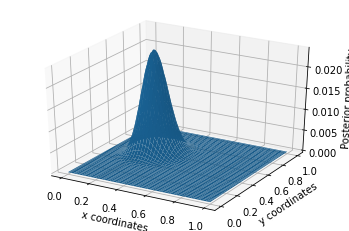

In [57]:
# Visualizing 
ax = plt.gca(projection='3d') 

# Creating the grid that x, y produce 
X, Y = np.meshgrid(x, y)

ax.plot_surface(X,Y,postMatrix)
ax.set_xlabel("x coordinates")
ax.set_ylabel("y coordinates")
ax.set_zlabel("Posterior probability")
plt.show()

**Question 3** :

 Lastly, we would like to visualize and understand how our belief about the coin’s position changes with each new observation, similar to Bayes’ original thought experiment. For this purpose you are provided with the files fronts.csv and lefts.csv (Bonus 10%).


$a)$ Load the csv files given to you.

In [59]:
# Loading the csv files
frontsPath = "/content/drive/MyDrive/Colab Notebooks/Pattern_Recognition/Assignment_2/fronts.csv"
leftsPath = "/content/drive/MyDrive/Colab Notebooks/Pattern_Recognition/Assignment_2/lefts.csv"

fronts = pd.read_csv(frontsPath)
lefts = pd.read_csv(leftsPath)

# turning the datasets lists
leftsL = [i[0] for i in lefts.values]
frontsL = [i[0] for i in fronts.values]

# creating a list of tuples (L, F) 
obser = list(zip(leftsL, frontsL))

# Creating a list of matrices. Each matrix will represent the frame of each observation
PostMatrices = []
for j in obser:
  # Creating the matrices 
  postList_new = [postCalc(i[0], i[1], j[0], j[1], N) for i in points]
  postArr_new = np.array(postList)
  postMatrix_new = np.array(np.array_split(postArr, 100))

  # Appending the matrices
  PostMatrices.append(postMatrix_new)

$b)$ Use the following libraries and commands to create an animated 3D plot
of 30 frames, that is 1 frame for each new observation (the first elements of the files are the first observation, the second elements are the second observation, etc...). Each frame should be a 3D plot (as in the previous step) of the posterior probabilities of each point of the table after each observation.

from matplotlib import rc

rc('animation', html='jshtml')

from mpl_toolkits import mplot3d

import matplotlib.animation as animation